In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions.feedback import KMeansSegmentation, VectorSegmenter, HyperplaneSegmentation
from functions.funcs import get_kxk_square, get_kxk_square_values, assess_square, signal_results, row_agg, kmeans_step, plane_step, initialize_segmenters
from functions.classifiers3x3 import c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13
from functions.classifierskxk import bars, all_kxk_activations, activations_to_binary, new_kmeans_step

# Create vector of zeros length 364, to be modified when learning starts
kmeans_amps = np.zeros(336)
plane_amps = np.zeros(336)

test = pd.read_csv('digit-recognizer/test.csv')
train = pd.read_csv('digit-recognizer/train.csv')
labels = train.iloc[:, 0] 
data = train.iloc[:, 1:]  

kmeans_segmenter, plane_segmenter = initialize_segmenters(num_sections=14, len=336)

In [2]:
amps, correct = new_kmeans_step(data=data, image=0, kmeans_amps=kmeans_amps, k=5, labels=labels, kmeans_segmenter=kmeans_segmenter)
print(amps)

-----------------IMAGE 0-----------------
kmeans no match: guess = 3 , actual = 1
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [3]:
num_sections = 100

kmeans_count=0
plane_count=0
kmeans_correct_pct = []
plane_correct_pct = []

num_train = 250
num_iters = 6

for j in range(num_iters):
    print(f"-----------------------Iteration {j}-----------------------")
    for i in range(num_train):
        kmeans_amps, kmeans_correct = new_kmeans_step(data=data, image=i, kmeans_amps=kmeans_amps, k=5,
                                            labels=labels, kmeans_segmenter=kmeans_segmenter, num_sections=num_sections)
        kmeans_count += kmeans_correct
        if (i == 0 and j == 0):
            kmeans_correct_pct.append(0)
        else:
            kmeans_correct_pct.append(kmeans_count / ((j*num_train) + i))

-----------------------Iteration 0-----------------------
-----------------IMAGE 0-----------------
kmeans no match: guess = 3 , actual = 1
-----------------IMAGE 1-----------------
kmeans no match: guess = 2 , actual = 0
-----------------IMAGE 2-----------------
kmeans no match: guess = 3 , actual = 1
-----------------IMAGE 3-----------------
kmeans no match: guess = 10 , actual = 4
-----------------IMAGE 4-----------------
kmeans no match: guess = 2 , actual = 0
-----------------IMAGE 5-----------------
kmeans no match: guess = 3 , actual = 0
-----------------IMAGE 6-----------------
kmeans no match: guess = 1 , actual = 7
-----------------IMAGE 7-----------------
kmeans no match: guess = 9 , actual = 3
-----------------IMAGE 8-----------------
kmeans no match: guess = 10 , actual = 5
-----------------IMAGE 9-----------------
kmeans no match: guess = 10 , actual = 3
-----------------IMAGE 10-----------------
kmeans no match: guess = 9 , actual = 8
-----------------IMAGE 11-----------

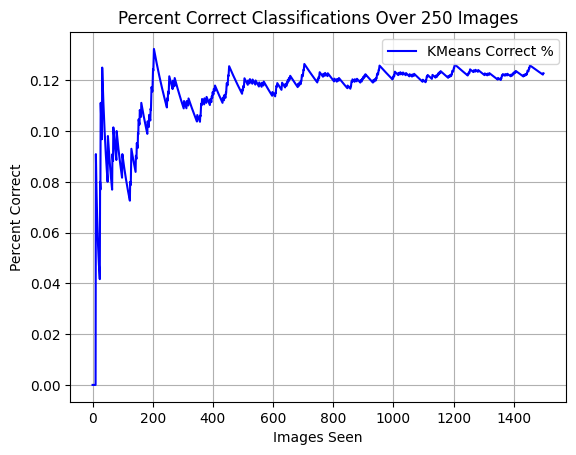

In [4]:
# Create a time axis from 0 to 99
time = np.arange(len(kmeans_correct_pct))

# Plot the values over time

plt.plot(time, kmeans_correct_pct, linestyle='-', color='b', label='KMeans Correct %')
# plt.plot(time, plane_correct_pct, linestyle='-', color='r', label='Plane Correct %')
plt.xlabel("Images Seen")
plt.ylabel("Percent Correct")
plt.title(f"Percent Correct Classifications Over {num_train} Images")
plt.grid(True)
plt.legend()
plt.show()

In [5]:
print(kmeans_amps)

[-2.12074831e+03  0.00000000e+00  0.00000000e+00 -6.00000000e+00
  0.00000000e+00  0.00000000e+00 -8.50000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.17000000e+01 -3.75000000e+01 -1.87460305e+03  0.00000000e+00
  0.00000000e+00 -4.75936620e+01  0.00000000e+00  0.00000000e+00
 -4.16683099e+01  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -2.58488732e+02 -2.41151408e+02
 -1.58062803e+03  0.00000000e+00 -3.30000000e+00 -7.05091549e+01
  0.00000000e+00  0.00000000e+00 -8.13000000e+01 -3.00000000e-01
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.18812676e+02 -2.57500000e+02 -1.30070801e+03 -1.44000000e+01
 -8.75352113e+00 -1.41364085e+02  0.00000000e+00  0.00000000e+00
 -1.15454225e+02 -5.40000000e+00  0.00000000e+00 -3.20000000e+00
  0.00000000e+00 -2.30000000e+00 -7.63109155e+02 -2.65900000e+02
 -1.08737481e+03 -2.09246479e+02 -1.81450704e+01 -1.75332394e+02
  0.00000000e+00  0.00000